### 1. Setup Datanya

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1, 7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0, 65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1],
    'Sales': [22.1, 10.4, 12.0, 16.6, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6, 12.6, 17.4, 9.2, 9.7, 19.0, 22.4, 12.5, 24.4, 11.3, 14.6]
}
df = pd.DataFrame(data)

print(df)

       TV  Radio  Newspaper  Sales
0   230.1   37.8       69.2   22.1
1    44.5   39.3       45.1   10.4
2    17.2   45.9       69.3   12.0
3   151.5   41.3       58.5   16.6
4   180.8   10.8       58.4   17.9
5     8.7   48.9       75.0    7.2
6    57.5   32.8       23.5   11.8
7   120.2   19.6       11.6   13.2
8     8.6    2.1        1.0    4.8
9   199.8    2.6       21.2   15.6
10   66.1    5.8       24.2   12.6
11  214.7   24.0        4.0   17.4
12   23.8   35.1       65.9    9.2
13   97.5    7.6        7.2    9.7
14  204.1   32.9       46.0   19.0
15  195.4   47.7       52.9   22.4
16   67.8   36.6      114.0   12.5
17  281.4   39.6       55.8   24.4
18   69.2   20.5       18.3   11.3
19  147.3   23.9       19.1   14.6


### 2. Eksplorasi Data Visual

Mari kita gunakan `pairplot` dari Seaborn untuk melihat hubungan antara setiap fitur iklan dan penjualan.

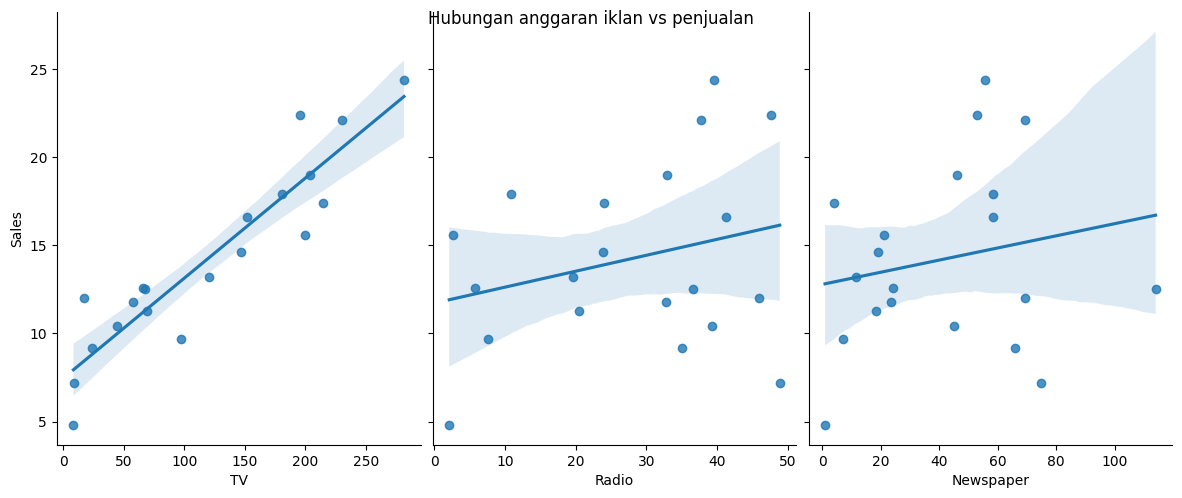

In [24]:
sns.pairplot(
    df,
    x_vars=['TV','Radio','Newspaper'],
    y_vars=['Sales'],
    height=5,
    aspect=0.8,
    kind='reg'
)
plt.suptitle('Hubungan anggaran iklan vs penjualan')
plt.show()

### 3. Persiapan Data dan Train-Test Split

Prosesnya sama seperti sebelumnya, tetapi sekarang `X` akan berisi tiga kolom.

In [25]:
X = df[['TV','Radio','Newspaper']]
Y = df['Sales']

print(f'bentuk X : {X.shape}')
print(f'bentuk Y : {Y.shape}')

bentuk X : (20, 3)
bentuk Y : (20,)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

### 4. Pelatihan Model

Inilah keindahan Scikit-learn. Meskipun sekarang kita menggunakan tiga fitur, kode untuk menginisiasi dan melatih model **sama persis** seperti pada Simple Linear Regression.

In [27]:
model = LinearRegression()
model.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### 5. Inspeksi dan Interpretasi Koefisien

Persamaan untuk model kita sekarang adalah:

`Sales = β₀ + β₁(TV) + β₂(Radio) + β₃(Newspaper)`

Mari kita lihat nilai-nilai `β` yang telah dipelajari model.

In [28]:
# tampilkan intercept
intercept = model.intercept_
coefficient = model.coef_

print(f'intercept (B0): {intercept:.2f}')
print(f'coefficient (B1, B2, B3): ({coefficient[0]:.2f}, {coefficient[1]:.2f}, {coefficient[2]:.2f})')

intercept (B0): 5.65
coefficient (B1, B2, B3): (0.05, 0.04, 0.02)


In [29]:
# membuat dataframe dari koeficient
coeff_df = pd.DataFrame(coefficient,index=X.columns, columns=['Coefficients'])
print(coeff_df)

           Coefficients
TV             0.052714
Radio          0.039531
Newspaper      0.021819


### 6. Membuat Prediksi dan Evaluasi Cepat

Mari kita gunakan model kita untuk memprediksi penjualan pada data pengujian dan lihat seberapa baik performanya.

In [30]:
Y_pred = model.predict(X_test)

# evaluasi
score = model.score(X_test, Y_test)
print(f'score R_squared: {score:.2f}')

score R_squared: 0.88
